In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Simple DFT example

real:  0.0 imag:  0.0
real:  0.0 imag:  0.0
real:  0.0 imag:  -4.0
real:  -0.0 imag:  0.0
real:  0.0 imag:  0.0
real:  -0.0 imag:  0.0
real:  -0.0 imag:  4.0
real:  -0.0 imag:  -0.0


/Users/dharanipathirathnakumar/opt/anaconda3/envs/FMP/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/dharanipathirathnakumar/opt/anaconda3/envs/FMP/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<function matplotlib.pyplot.show(*args, **kw)>

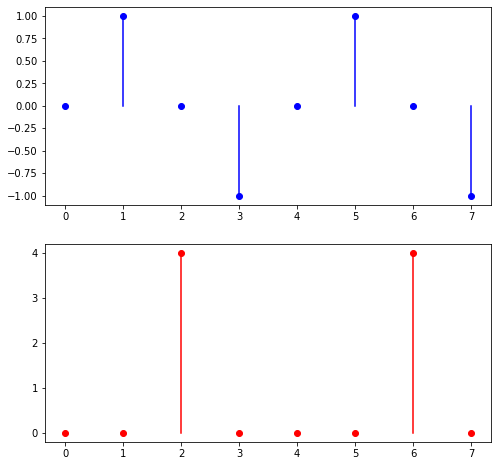

In [2]:
# Define the number of samples
N = 8

# Create an array to store the samples
sample = np.zeros(N)

# Set the frequency of the input signal
sampleF = 2

# Set the frequency range
freqRange = N

# Create an array to store the output of the DFT
output = np.zeros(freqRange)

# Set the initial phase of the input signal
phase = 0

# Generate the input signal samples
for i in range(N):
    # Generate a sinusoidal wave
    currentSample = np.sin(phase + 2*np.pi*sampleF*i/N)
    sample[i] = currentSample

# Perform the Discrete Fourier Transform (DFT)
K = freqRange

for k in range(K):
    sum = complex(0,0)

    for n in range(N):
        # Calculate the real and imaginary parts of the complex exponential
        realPart = np.cos(2*np.pi*k*n/N)
        imagPart = np.sin(2*np.pi*k*n/N)
        
        # Create the complex exponential
        w = complex(realPart, -imagPart)
        
        # Multiply the sample with the complex exponential and accumulate the sum
        sum += sample[n] * w
    
    # Calculate the magnitude of the sum and store it in the output array
    output[k] = np.abs(sum)
    
    # Print the real and imaginary parts of the sum
    print("real: ", round(sum.real), "imag: ", round(sum.imag))

# Plot the input and output signals
figure, axis = plt.subplots(2, figsize=(8, 8))

axis[0].stem(range(len(sample)), sample, basefmt=" ", linefmt="blue", markerfmt="bo")
axis[1].stem(range(len(output)), output, basefmt=" ", linefmt="red", markerfmt="ro")
axis[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axis[1].yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show

Shows what happens when you analyse for the input singal for one specific frequency(one loop of DFT)

<function matplotlib.pyplot.show(*args, **kw)>

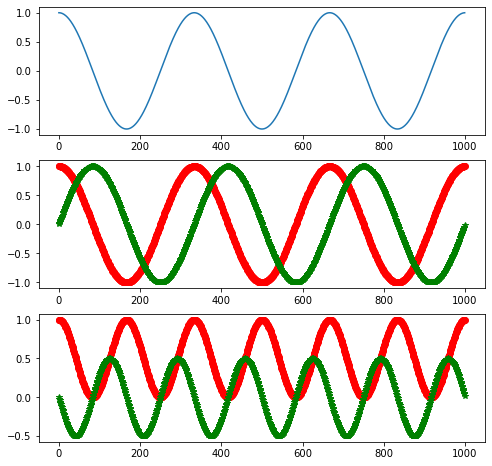

In [3]:
# Define the number of samples
N = 1000

# Create an array to store the samples
sample = np.zeros(N)

# Set the frequency of the input signal
sampleF = 3

# Set the frequency range
freqRange = 10

# Create arrays to store the real and imaginary parts of the complex exponential
real = np.zeros(N)
imag = np.zeros(N)

# Create arrays to store the real and imaginary parts of the output signal
realout = np.zeros(N)
imagout = np.zeros(N)

# Set the initial phase of the input signal
phase = 0

# Generate the input signal samples
for i in range(N):
    currentSample = np.cos(2*np.pi*sampleF*i/N)
    sample[i] = currentSample

# Choose a specific frequency index
k = 3

# Initialize the sum variable
sum = complex(0,0)

# Calculate the real and imaginary parts of the complex exponential
for n in range(N):
    realPart = np.cos(2*np.pi*k*n/N)
    imagPart = np.sin(2*np.pi*k*n/N)
    real[n] = realPart
    imag[n] = imagPart
    w =complex(realPart,-imagPart)
    
    # Multiply the sample with the complex exponential and accumulate the sum
    sum += sample[n] * w
    realout[n] = np.real(sample[n] * w)
    imagout[n] = np.imag(sample[n] * w)

# Create subplots for visualization
figure, axis = plt.subplots(3, figsize=(8, 8))

# Plot the input signal
axis[0].plot(sample)

# Plot the real and imaginary parts of the complex exponential
axis[1].plot(real, 'ro', imag, 'g*')

# Plot the real and imaginary parts of the output signal
axis[2].plot(realout, 'ro', imagout, 'g*')

# Display the plots
plt.show

better version using matrix multiplication and variable sample size

<function matplotlib.pyplot.show(*args, **kw)>

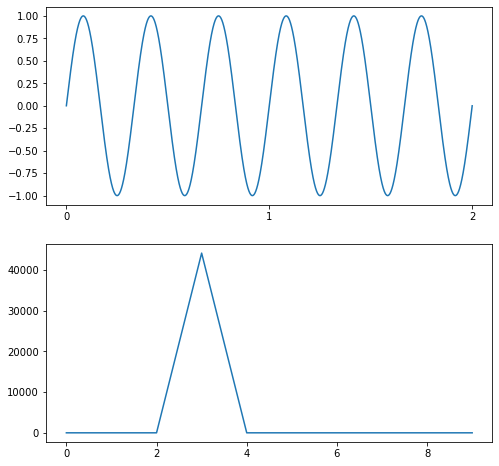

In [4]:
# Set the sample rate and duration
sampleRate = 44100
sec = 2

# Calculate the number of samples
N = sampleRate * sec

# Create an array to store the samples
sample = np.zeros(N)

# Set the frequency of the input signal
sampleFreq = 3

# Set the frequency range for the DFT
freqRange = 10

# Create an array to store the complex exponential
complexExp = np.zeros((freqRange, N), complex)

# Set the initial phase of the input signal
phase = 0

# Generate the input signal samples
for i in range(N):
    currentSample = np.sin(phase + 2*np.pi*sampleFreq*i/sampleRate)
    sample[i] = currentSample

# Calculate the complex exponential for each frequency and sample
for k in range(freqRange):
    for n in range(N):
        complexExp[k][n] = np.exp(-2*np.pi*k*1j*n/sampleRate)

# Perform the DFT by matrix multiplication
output = np.matmul(complexExp, sample)

# Calculate the magnitude of the output
output = np.abs(output)

# Plot the input signal and the output of the DFT
figure, axis = plt.subplots(2, figsize=(8, 8))
axis[0].plot(sample)
axis[0].set_xticks([0, N/2, N])
axis[0].set_xticklabels([0, 1, sec])
axis[1].plot(output)
plt.show

Inverse DFT

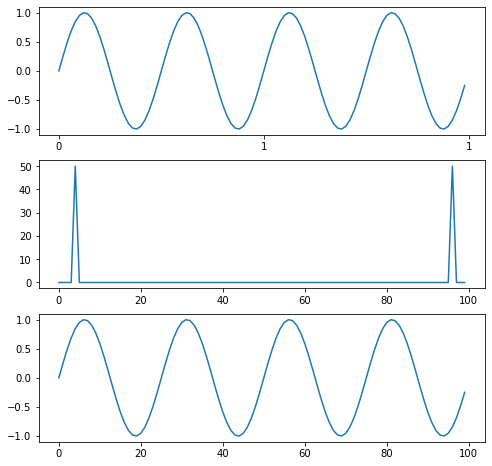

In [5]:
# Define variables
sampleRate = 100
sec = 1
N = sampleRate * sec
sampleFreq = 4
freqRange = 100
phase = 0

# Create an array of zeros for the sample
sample = np.zeros(N)

# Generate the sample values using sine function
for i in range(N):
    currentSample = np.sin(phase + 2*np.pi*sampleFreq*i/sampleRate)
    sample[i] = currentSample

# Create an array of zeros for the complex exponential
complexExp = np.zeros((freqRange,N), complex)

# Generate the complex exponential values
for k in range(freqRange):
    for n in range(N):
        complexExp[k][n] = np.exp(-2*np.pi*k*1j*n/sampleRate)

# Perform the Discrete Fourier Transform (DFT)
output = np.matmul(complexExp, sample)

# Calculate the absolute value of the output
abs_output = np.abs(output)

# Calculate the inverse complex exponential
inverseComplexExp = np.linalg.inv(complexExp)

# Perform the inverse DFT
inverse = np.matmul(inverseComplexExp, output)

# Create a figure with 3 subplots
figure, axis = plt.subplots(3, figsize=(8, 8))

# Plot the sample values
axis[0].plot(sample)
axis[0].set_xticks([0,N/2,N])
axis[0].set_xticklabels([0,1,sec])

# Plot the absolute value of the output
axis[1].plot(abs_output)

# Plot the real part of the inverse DFT
axis[2].plot(inverse.real)

# Display the plot
plt.show()
